In [1]:
%pip install tensorflow-gpu tensorflow stable-baselines3 pip install gym_anytrading gym==0.25.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gymnasium as gym
import gym_anytrading



from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("E:\RL\AnyTrading\Download Data - STOCK_US_XNYS_GME.csv")

<>:1: DeprecationWarning: invalid escape sequence '\R'


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,06/10/2024,28.97,29.34,23.06,24.83,"131,572,406"
1,06/07/2024,37.69,48.00,26.12,28.22,"279,054,406"
2,06/06/2024,31.57,47.50,31.28,46.55,"206,685,797"
3,06/05/2024,26.30,31.84,26.11,31.57,"73,156,414"
4,06/04/2024,26.26,28.01,25.20,26.50,"51,662,129"


In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [6]:
df['Date'] =pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-10,28.97,29.34,23.06,24.83,"131,572,406"
2024-06-07,37.69,48.00,26.12,28.22,"279,054,406"
2024-06-06,31.57,47.50,31.28,46.55,"206,685,797"
2024-06-05,26.30,31.84,26.11,31.57,"73,156,414"
2024-06-04,26.26,28.01,25.20,26.50,"51,662,129"


In [23]:
from gym.envs.registration import register

try:
    register(
        id='stocks-v0',
        entry_point='gym_anytrading.envs:StocksEnv',
    )
except Exception as e:
    print(f"Environment might already be registered: {e}")

# Now try to create the environment
env = gym.make('stocks-v0',df=df, frame_bound= (5,200), window_size=5)

info {'total_reward': -9.250001907348633, 'total_profit': 0.28360569704900596, 'position': <Positions.Short: 0>}


e:\RL\.venv\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


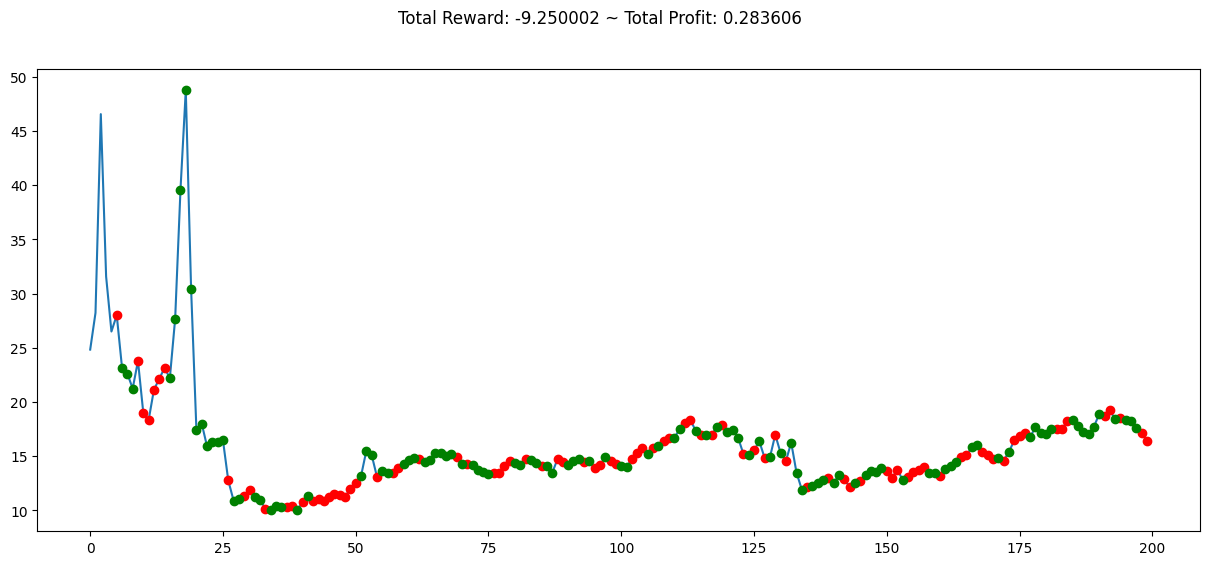

In [18]:
state= env.reset()

while True:
    action = env.action_space.sample()
    next_state, reward,terminated, truncated, info = env.step(action)
    done=terminated or truncated

    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [24]:
env_maker=lambda: gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)
env= DummyVecEnv([env_maker])

In [25]:
model=A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 349      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | -0.0218  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.579    |
|    value_loss         | 1.79     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 428      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.546   |
|    explained_variance | -1.99    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -2.2     |
|    value_loss      

In [13]:
env = gym.make('stocks-v0', df=df, frame_bound=(201,250), window_size=5)
obs = env.reset()
if isinstance(obs, tuple):
    obs = obs[0]  # Adjust based on your specific observation structure

# Make sure obs is a numpy array
obs = np.array(obs)

while True:
    obs = obs[np.newaxis, ...]  # Add batch dimension
    action, _states = model.predict(obs)
    obs, rewards,terminated,truncated, info = env.step(action)
    done = terminated or truncated
    
    if isinstance(obs, tuple):
        obs = obs[0]  # Adjust based on your specific observation structure

    obs = np.array(obs)  # Ensure obs is a numpy array

    if done:
        print("info", info)
        break



info {'total_reward': 7.220006942749023, 'total_profit': 1.1274282396854638, 'position': <Positions.Short: 0>}


e:\RL\.venv\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


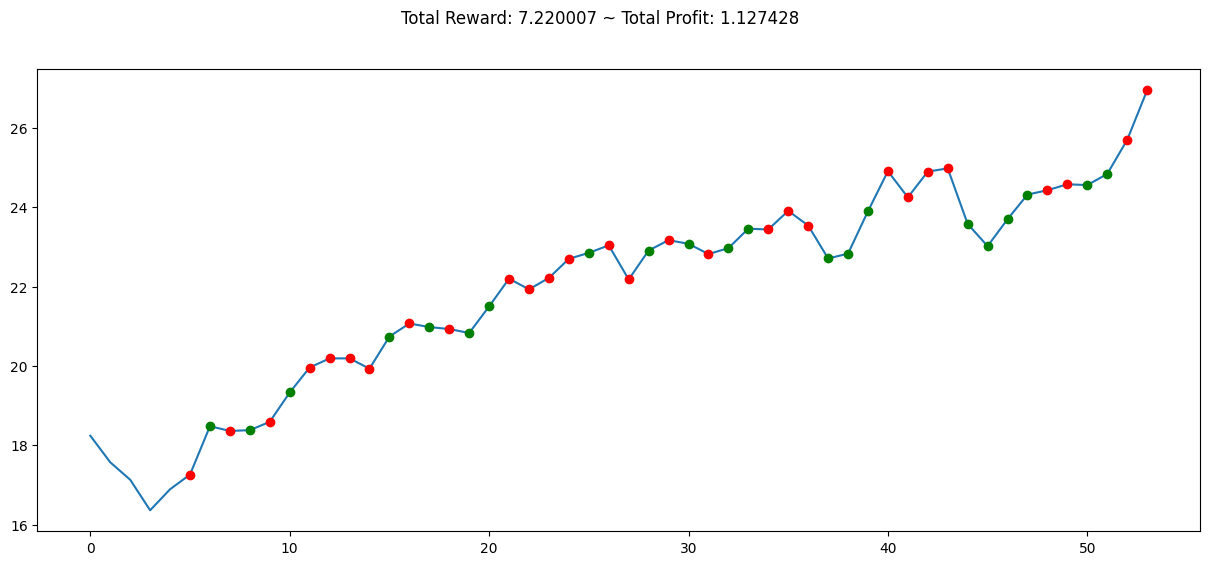

In [14]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
